In [1]:
import numpy as np
import matplotlib.pyplot as plt
import edl
import plotting

%matplotlib widget

In [2]:
potentials = np.linspace(-0.7, 0.3, 300)

x_list = [2, 6, 25, 100]
sol_list = []

for x in x_list:
    model = edl.ProtonLPB(x * 1e-3, 60, 8, 60, 8)
    sol = model.potential_sweep(potentials, tol=1e-4, p_h=3)
    # sol.cap = 1/(sol.cap**(-1) + 100**(-1))
    sol_list.append(sol)

Sweep from -0.00V to -0.70V. Maximum relative residual: 3.50022e-06.
Sweep from -0.00V to 0.30V. Maximum relative residual: 3.50020e-06.
Sweep from -0.00V to -0.70V. Maximum relative residual: 3.62302e-06.
Sweep from -0.00V to 0.30V. Maximum relative residual: 3.51206e-06.
Sweep from -0.00V to -0.70V. Maximum relative residual: 3.44720e-06.
Sweep from -0.00V to 0.30V. Maximum relative residual: 3.53974e-06.
Sweep from -0.00V to -0.70V. Maximum relative residual: 3.58670e-06.
Sweep from -0.00V to 0.30V. Maximum relative residual: 3.26871e-06.


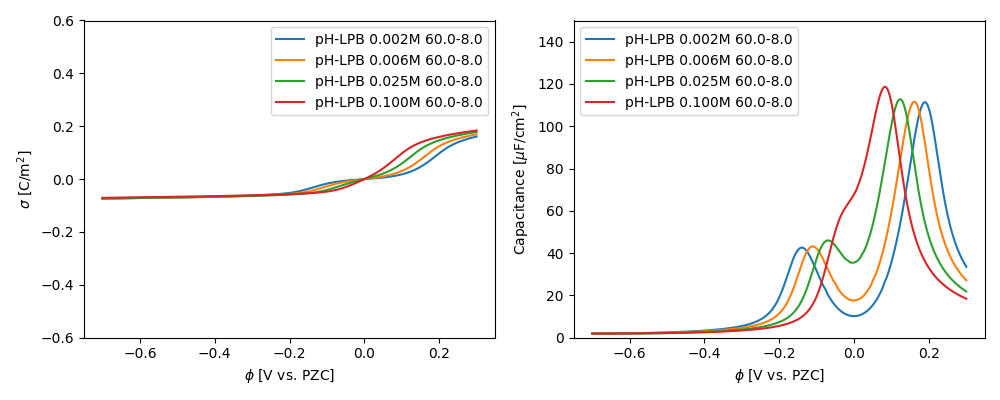

In [3]:
fig, ax = plotting.plot_potential_sweep(sol_list)
plt.show()

In [4]:
import constants as C 
2*2.303*C.K_B*C.T/C.E_0 * 1e3

118.23791760299625